<a href="https://colab.research.google.com/github/SwapnilGanguly/Machine_Learning_Projects/blob/main/3_House_Price_Prediction_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

**Importing the Boston House Price Dataset**

In [9]:
# house_price_dataset = sklearn.datasets.load_boston()
# print(house_price_dataset)

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# print(raw_df)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
# print(data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [22]:
house_price_dataframe = pd.DataFrame(data)

In [23]:
print(house_price_dataframe.head())

        0     1     2    3      4      5     6       7    8      9     10      11    12
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3  396.90  4.98
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8  396.90  9.14
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8  392.83  4.03
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7  394.63  2.94
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7  396.90  5.33


In [28]:
house_price_dataframe[13] = pd.DataFrame(target)


In [30]:
house_price_dataframe = house_price_dataframe.set_axis(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'price'], axis=1)

In [31]:
print(house_price_dataframe.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM  ...  RAD    TAX  PTRATIO       B  LSTAT  price
0  0.00632  18.0   2.31   0.0  0.538  6.575  ...  1.0  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  6.421  ...  2.0  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  7.185  ...  2.0  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  6.998  ...  3.0  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  7.147  ...  3.0  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]


In [32]:
house_price_dataframe.shape

(506, 14)

In [35]:
# Check for missing values
house_price_dataframe.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [36]:
# Statistical measures
house_price_dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.659710,11.406324,11.189269,0.135178,0.625173,6.329597,68.498024,3.839297,9.574111,407.667787,18.443676,355.926996,12.679625,22.532806
std,8.648110,23.321380,6.938541,1.503339,1.588857,1.219168,28.220430,2.346464,8.709216,169.364414,2.167412,92.503580,7.149679,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,18.900000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,44.550000,2.100175,4.000000,279.000000,17.325000,375.240000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.000000,391.385000,11.395000,21.200000
75%,3.689388,12.500000,18.100000,0.000000,0.624000,6.628000,94.075000,5.213925,24.000000,666.000000,20.200000,396.210000,17.057500,25.000000
max,88.976200,100.000000,34.700000,33.400000,36.200000,28.700000,100.000000,27.100000,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Understanding the correlation between various features in the dataset**

1. Positive correlation
2. Negative correlation

In [38]:
correlation = house_price_dataframe.corr()
print(correlation)

             CRIM        ZN     INDUS      CHAS  ...   PTRATIO         B     LSTAT     price
CRIM     1.000000 -0.197693  0.415354  0.093836  ...  0.281445 -0.394691  0.458089 -0.387455
ZN      -0.197693  1.000000 -0.525316  0.011931  ... -0.391494  0.170495 -0.412016  0.360037
INDUS    0.415354 -0.525316  1.000000  0.159237  ...  0.368822 -0.372464  0.604232 -0.480032
CHAS     0.093836  0.011931  0.159237  1.000000  ... -0.090155 -0.151782  0.046234  0.019408
NOX      0.135016 -0.018271  0.205588  0.984124  ... -0.056796 -0.189204  0.099077 -0.041472
RM      -0.040234  0.195458 -0.100058  0.814436  ... -0.261848 -0.059563 -0.307720  0.392173
AGE      0.342241 -0.569752  0.624827 -0.056379  ...  0.266208 -0.257388  0.595749 -0.375366
DIS     -0.292353  0.605239 -0.561242  0.420215  ... -0.240537  0.186187 -0.420176  0.219903
RAD      0.625272 -0.311818  0.593091  0.033611  ...  0.463085 -0.443706  0.489192 -0.382200
TAX      0.565674 -0.315610  0.693212 -0.106815  ...  0.466709 -0.4167

<Axes: >

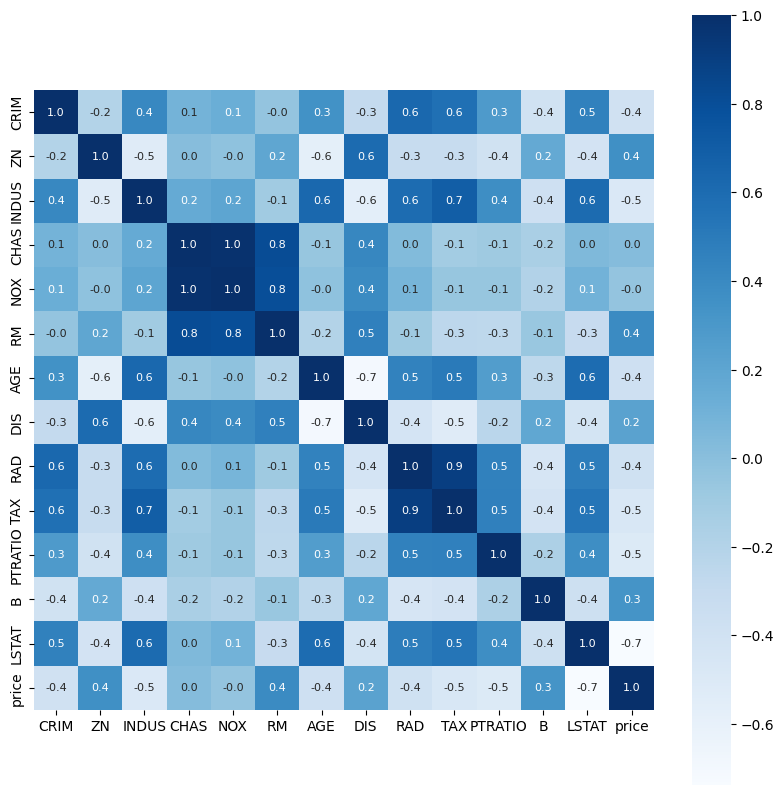

In [41]:
# Constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

**Separating the data and targets**

In [48]:
X = house_price_dataframe.drop(['price'], axis=1)
y = house_price_dataframe['price']

In [49]:
print(X)
print(y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  

**Train test split**

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [51]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


**Training our model**

**XGBoost Regressor**

In [52]:
model = XGBRegressor()


In [53]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**Evaluation**

Prediction of Training data

In [54]:
# Accuracy for the prediction on the training data
training_data_prediction = model.predict(X_train)
print(training_data_prediction)

[23.13017   20.986496  20.100338  34.687695  13.906722  13.498249
 21.999458  15.20478   10.89869   22.698038  13.79896    5.6013713
 29.808317  50.005028  34.89418   20.60347   23.36998   19.216286
 32.693733  19.603159  26.980192   8.404003  45.99922   21.701786
 27.089302  19.35566   19.29496   24.806545  22.610933  31.703453
 18.523317   8.702398  17.403513  23.702047  13.3004    10.48482
 12.695719  25.005537  19.70028   14.905289  24.216213  24.998915
 14.904471  17.004847  15.600427  12.701965  24.523441  15.008406
 50.000805  17.539078  21.189068  31.999199  15.592998  22.899916
 19.31196   18.707994  23.29664   37.209038  30.098665  33.110245
 20.991316  49.999058  13.3960495  5.003442  16.505333   8.405708
 28.68841   19.48869   20.590704  45.39652   39.79996   33.398163
 19.806435  33.404316  25.299511  49.9995    12.522186  17.430662
 18.602007  22.602034  50.002422  23.796982  23.307022  23.095219
 41.716118  16.111685  31.63202   36.102222   7.004221  20.399076
 19.99764 

**Evaluation of Training data**

In [55]:
# R2 error
r2score = metrics.r2_score(y_train, training_data_prediction)

# Mean Absolute Error
mae = metrics.mean_absolute_error(y_train, training_data_prediction)

print("R2 error: ", r2score)
print("Mean Absolute Error: ", mae)

R2 error:  0.9999983198960755
Mean Absolute Error:  0.008116779469027408


**Visualizing the actual prices and the predicted prices**

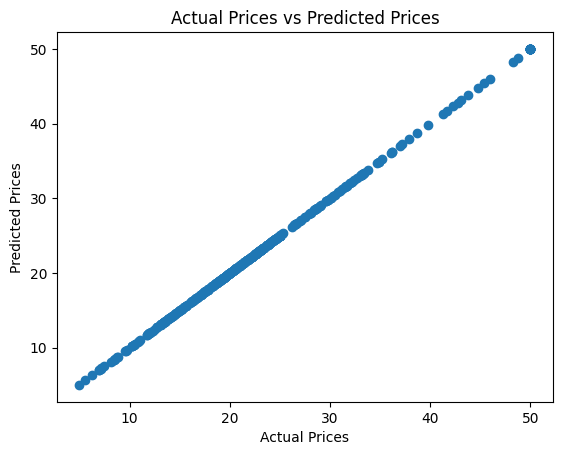

In [59]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

**Prediction of Test data**

In [57]:
# Accuracy for the prediction on the test data
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[20.612696  21.982704  31.329603  32.717457   7.913058  14.585243
 22.316734  25.068314  20.445896  22.259834  25.95939   23.573456
 20.704414  21.87111   12.006586  21.077454  19.420237  11.328942
  9.827262  14.794007  22.415615  20.51951   35.01511   18.6409
 13.136154  18.678059  39.982784  30.230215  33.685425  18.733767
 18.385878  19.38545   30.392303  24.386751  11.095819  19.087198
 10.708993  21.581142  22.063002  21.736513  25.651445  13.411521
 29.698885   8.792755  20.70869   12.427158  35.17371   15.540765
 32.283127  13.63556   29.964481  26.13666    6.8198104 34.023685
 18.545126  19.396364  19.081112  20.56616   15.221875  22.672464
 20.90164   20.690832  17.593338  31.23428   33.75249   25.422964
 49.70161   26.684149  10.135302  22.730185  15.540464   8.096947
 15.540656  17.9192    27.375734  23.116661  21.499031  23.072334
 19.099394  24.92549   34.273495  19.249395  21.572437  31.346827
 49.027485  35.432636  18.900581  24.656464  28.215527  21.892992
 20.69484   

**Evaluation of Test data**

In [58]:
# R2 error
r2score = metrics.r2_score(y_test, test_data_prediction)

# Mean Absolute Error
mae = metrics.mean_absolute_error(y_test, test_data_prediction)

print("R2 error: ", r2score)
print("Mean Absolute Error: ", mae)

R2 error:  0.8761568621397767
Mean Absolute Error:  2.1667834786807787


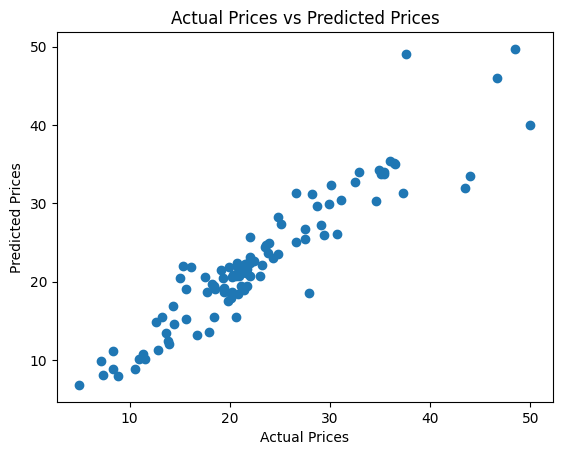

In [60]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()